In [1]:
cd C:/Jade/thesis/data/Yu-Jie 11 strains 2/

C:\Jade\thesis\data\Yu-Jie 11 strains 2


In [2]:
pwd

'C:\\Jade\\thesis\\data\\Yu-Jie 11 strains 2'

In [3]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.3.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     23.2.0
Babel                     2.14.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.16.0
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cycler                    0.12.1
debugpy                   1.8.1
decorator                 5.1.1
defusedxml                0.7.1
exceptiongroup            1.2.0
executing                 2.0.1
fastjsonschema            2.19.1
fonttools                 4.51.0
fqdn                      1.5.1
h11                       0.14.0
httpcore                  1.0.5
httpx                     0.27.0
idna           

In [3]:
import pickle
import pandas as pd
from pathlib import Path
import tifffile as tiff
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import interpolate
import scipy.ndimage
from skimage.draw import polygon2mask
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.measure import regionprops_table, label
from skimage.draw import polygon2mask
from skimage.morphology import closing, erosion
from shapely.geometry import Polygon
from scipy.stats import zscore
import seaborn as sns
from matplotlib.patches import Patch
from scipy.stats import shapiro

<h2>Import feature data

In [4]:
pkl_file = 'C:/Jade/thesis/data/Yu-Jie 11 strains 2/AllData.pkl'
with open(pkl_file, "rb") as file:
  result_dataframes = pickle.load(file)

# strain list
#BW25113
#dacA
#lpp 
#tolR 
#yfaQ 
#yijD 
#hdfR
#mlpI 
#wzzE
#yaaY 
#yifE

# Feature list

In [5]:
result_dataframes['strain']

0        BW25113
1        BW25113
2        BW25113
3        BW25113
4        BW25113
          ...   
13898       yifE
13899       yifE
13900       yifE
13901       yifE
13902       yifE
Name: strain, Length: 13903, dtype: object

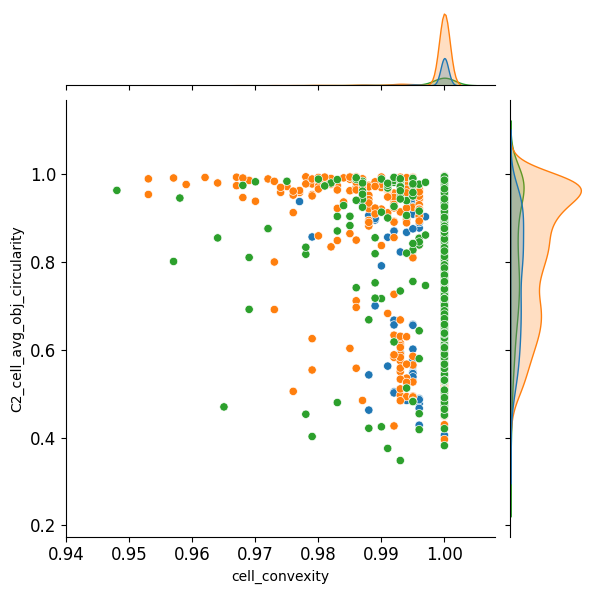

In [10]:
# Choose one visulaization

#1 all data points
data = result_dataframes

#2 Choose specific strain names
specific_strains = ['BW25113', 'tolR','lpp']  # Update with the desired strains
data = data[data['strain'].isin(specific_strains)]

#3 all meam/median grouped data point (original unit)
# numeric_columns = result_dataframes.select_dtypes(include=['number'])
# result_dataframes_mean = numeric_columns.groupby(result_dataframes['strain']).mean()
# data = result_dataframes_mean

# #change to log-log
# # Apply log-log transformation to each value in the DataFrame
# log_log_data = np.log(np.log(data))

# # Optionally, replace the original data with the transformed data
# data = log_log_data


#4 all mean/median grouped data points (after scaled)
# data = result_dataframes_mean_grouped
# data = result_dataframes_median_grouped







g = sns.jointplot(data=data, 
              x="cell_convexity", 
              y="C2_cell_avg_obj_circularity", 
                  
              # x="C2_cell_avg_obj_solidity", 
              # y="C2_cell_avg_obj_convexity", 
                  
              # x="cell_SOV", 
              # y="C2_cell_avg_obj_SOV", 
                  
              # x="cell_aspect_ratio", 
              # y="C2_cell_avg_obj_aspectratio", 
                  
              # x="C2_glcm_dissimilarity", 
              # y="C3_glcm_contour_dissimilarity", 
                  
              # x="C2_glcm_object_dissimilarity",    
              # y="C3_glcm_contour_dissimilarity",
                  
              # x="C2_glcm_object_homogeneity",    
              # y="C3_glcm_contour_homogeneity",
                  
              # x="C2_glcm_object_shannon_entropy",   
              # y="C3_glcm_contour_shannon_entropy",
                  
              hue='strain',
              legend=False)



# Set the size of x-axis scale labels
g.ax_joint.tick_params(axis='x', labelsize=12)

# Set the size of y-axis scale labels
g.ax_joint.tick_params(axis='y', labelsize=12)

plt.show()

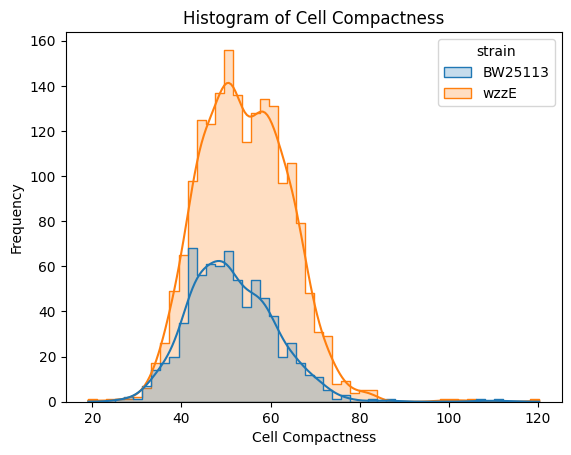

In [11]:
# Filter the data for the strains 'BW25113' and 'wzzE'
filtered_data = result_dataframes[result_dataframes['strain'].isin(['BW25113', 'wzzE'])]

# Plot histogram of 'cell_compactness' for both strains
sns.histplot(data=filtered_data, x='C2_cell_obj_contour_avg_bending_energy', hue='strain', kde=True, element='step')
plt.title('Histogram of Cell Compactness')
plt.xlabel('Cell Compactness')
plt.ylabel('Frequency')
plt.show()

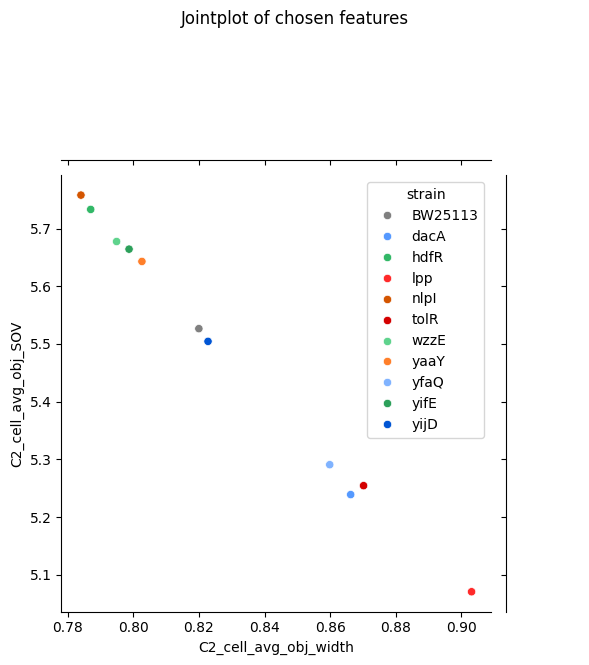

In [15]:
#1 all data points
data = result_dataframes

#2 Choose specific strain names
# specific_strains = ['BW25113', 'tolR']  # Update with the desired strains
# data = data[data['strain'].isin(specific_strains)]

#3 all meam/median grouped data point (original unit)
numeric_columns = result_dataframes.select_dtypes(include=['number'])
result_dataframes_mean = numeric_columns.groupby(result_dataframes['strain']).mean()
data = result_dataframes_mean


#4 all mean/median grouped data points (after scaled)
# data = result_dataframes_mean_grouped
# data = result_dataframes_median_grouped


# Define custom color palette
custom_palette = {
    'BW25113': 'grey',
    'yfaQ': '#80b3ffff',
    'dacA': '#5599ffff',
    'yijD': '#0055d4ff',
    'yaaY': '#ff7f2aff',
    'nlpI': '#d45500ff',
    'lpp': '#ff2a2aff',
    'tolR': '#d40000ff',
    'wzzE': '#5fd38dff',
    'hdfR': '#32b867ff',
    'yifE': '#2ca05aff'
}

# Assuming 'data' is your DataFrame containing the data
# Assuming 'strain' is a column in your DataFrame indicating the strain names

g = sns.jointplot(data=data, 
                  x="C2_cell_avg_obj_width",    
                  y="C2_cell_avg_obj_SOV",
                 

                  hue='strain',
                  palette=custom_palette)  # Use custom palette here
plt.suptitle("Jointplot of chosen features", y=1.1)
plt.show()


Normal distribution => Shapiro test

In [26]:
from scipy.stats import shapiro

filtered_df = result_dataframes.loc[result_dataframes['strain'] == 'BW25113', ['cell_width']]
data = filtered_df

w,pvalue = shapiro(data)
print(w, pvalue) # p-value <0.05 => not normal distribution

0.9702357649803162 3.804926859696245e-11


Homogeneity of variance => Levene’s test

In [27]:
from scipy.stats import levene

data = result_dataframes

# Group data by 'strain'
grouped_data = data.groupby('strain')

# Extract groups and convert them into a list of arrays
group_list = [group['C2_cell_avg_obj_convexity'].values for _, group in grouped_data]

# Perform Levene test
statistic, p_value = levene(*group_list)

# Print results
print("Levene Test Statistic:", statistic)
print("P-value:", p_value)

#p<0.05 => Groups have different variances

Levene Test Statistic: 50.8070736414514
P-value: 6.728087347043367e-101


Non-parametric ANOVA with post hoc tests =>Kruskal-Wallis test\
Compare the mean ranking of scores across three or more independent data samples.\
Samples can be of equal or different sizes.\
Determine if the samples originate from the same distribution.

In [18]:
from scipy.stats import kruskal

group_data = [result_dataframes.loc[ids, 'cell_width'].values for ids in result_dataframes.groupby('strain').groups.values()]

# Conduct the Kruskal-Wallis Test 
w,p = kruskal(*group_data)
 
# Print the result
print(p)



0.0


Non-parametric post-hoc test for multiple groups => Conover squared ranks test for equality of variance

In [20]:
import scikit_posthocs as sp
sp.posthoc_conover(result_dataframes, val_col='cell_compactness', group_col='strain', p_adjust = 'bonferroni')

,BW25113,dacA,hdfR,lpp,nlpI,tolR,wzzE,yaaY,yfaQ,yifE,yijD
BW25113,1.000000e+00,3.123389e-05,3.440104e-04,1.578754e-80,4.883444e-08,8.061627e-23,2.556485e-02,3.467715e-05,1.000000e+00,4.085641e-12,1.715527e-10
dacA,3.123389e-05,1.000000e+00,8.459763e-22,3.022815e-70,4.123377e-27,1.317638e-10,7.883367e-26,1.642811e-33,1.344090e-14,5.508503e-50,4.410355e-42
hdfR,3.440104e-04,8.459763e-22,1.000000e+00,4.299312e-124,1.000000e+00,2.414616e-44,1.000000e+00,1.000000e+00,7.152572e-02,1.000000e+00,1.000000e+00
lpp,1.578754e-80,3.022815e-70,4.299312e-124,1.000000e+00,2.257010e-118,3.532166e-06,7.512650e-212,1.488855e-219,1.034822e-145,1.620619e-248,1.863810e-205
nlpI,4.883444e-08,4.123377e-27,1.000000e+00,2.257010e-118,1.000000e+00,2.194111e-49,2.851569e-03,4.779390e-01,2.185937e-05,1.000000e+00,1.000000e+00
tolR,8.061627e-23,1.317638e-10,2.414616e-44,3.532166e-06,2.194111e-49,1.000000e+00,1.342507e-50,2.822508e-58,1.397676e-37,4.516547e-74,9.318068e-67
wzzE,2.556485e-02,7.883367e-26,1.000000e+00,7.512650e-212,2.851569e-03,1.342507e-50,1.000000e+00,1.000000e+00,1.000000e+00,5.429503e-06,1.156845e-04
yaaY,3.467715e-05,1.642811e-33,1.000000e+00,1.488855e-219,4.779390e-01,2.822508e-58,1.000000e+00,1.000000e+00,1.979328e-02,6.651292e-02,2.503203e-01
yfaQ,1.000000e+00,1.344090e-14,7.152572e-02,1.034822e-145,2.185937e-05,1.397676e-37,1.000000e+00,1.979328e-02,1.000000e+00,3.907322e-09,1.678701e-07
yifE,4.085641e-12,5.508503e-50,1.000000e+00,1.620619e-248,1.000000e+00,4.516547e-74,5.429503e-06,6.651292e-02,3.907322e-09,1.000000e+00,1.000000e+00


The Bonferroni test is a multiple-comparison correction used when several dependent or independent statistical tests are being performed simultaneously. The reason is that while a given alpha value may be appropriate for each individual comparison, it is not appropriate for the set of all comparisons. \
For example, an error rate of 5% might typically be assigned to a statistical test, meaning that 5% of the time there will likely be a false positive. This 5% error rate is called the alpha level. However, when many comparisons are being made in an analysis, the error rate for each comparison can impact the other results, creating multiple false positives.


posthoc_conover => Post hoc pairwise test for multiple comparisons of mean rank sums (Conover´s test). May be used after Kruskal-Wallis one-way analysis of variance by ranks to do pairwise comparisons 

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x245b1a4c190>)

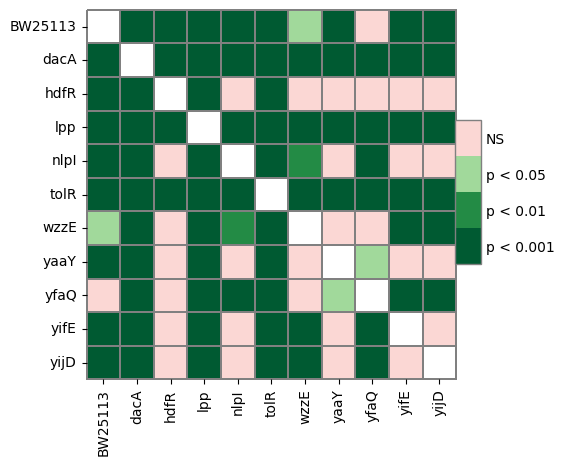

In [21]:
pc = sp.posthoc_conover(result_dataframes, val_col='cell_compactness', group_col='strain', p_adjust = 'bonferroni') #Benjamini/Hochberg = fdr_by
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

Non-parametric post-hoc test for multiple groups => Dunn-Bonferroni test for comparing the mean difference of numerous samples\
does not rely on assumptions about the distribution of the data.\
For simple comparisons, equal-size groups as well as unequal-size groups.\
'dunn.test' accounts for tied ranks

In [22]:
sp.posthoc_dunn(result_dataframes, val_col='cell_compactness', group_col='strain', p_adjust = 'bonferroni')

,BW25113,dacA,hdfR,lpp,nlpI,tolR,wzzE,yaaY,yfaQ,yifE,yijD
BW25113,1.000000e+00,2.162192e-04,1.691170e-03,1.984054e-69,8.538481e-07,1.833509e-19,6.837110e-02,2.364934e-04,1.000000e+00,2.753451e-10,6.757887e-09
dacA,2.162192e-04,1.000000e+00,1.378594e-18,1.850164e-60,3.784784e-23,5.391139e-09,4.775366e-22,1.185014e-28,2.057059e-12,7.162278e-43,4.844911e-36
hdfR,1.691170e-03,1.378594e-18,1.000000e+00,9.078670e-108,1.000000e+00,5.401155e-38,1.000000e+00,1.000000e+00,1.657334e-01,1.000000e+00,1.000000e+00
lpp,1.984054e-69,1.850164e-60,9.078670e-108,1.000000e+00,1.055135e-102,3.340575e-05,1.094040e-186,1.005051e-193,5.347674e-127,2.413656e-220,7.363674e-181
nlpI,8.538481e-07,3.784784e-23,1.000000e+00,1.055135e-102,1.000000e+00,2.367913e-42,1.038388e-02,8.529505e-01,1.592462e-04,1.000000e+00,1.000000e+00
tolR,1.833509e-19,5.391139e-09,5.401155e-38,3.340575e-05,2.367913e-42,1.000000e+00,2.110964e-43,4.699917e-50,3.694561e-32,8.578414e-64,2.013804e-57
wzzE,6.837110e-02,4.775366e-22,1.000000e+00,1.094040e-186,1.038388e-02,2.110964e-43,1.000000e+00,1.000000e+00,1.000000e+00,4.828184e-05,6.642507e-04
yaaY,2.364934e-04,1.185014e-28,1.000000e+00,1.005051e-193,8.529505e-01,4.699917e-50,1.000000e+00,1.000000e+00,5.486627e-02,1.556812e-01,4.879444e-01
yfaQ,1.000000e+00,2.057059e-12,1.657334e-01,5.347674e-127,1.592462e-04,3.694561e-32,1.000000e+00,5.486627e-02,1.000000e+00,9.821277e-08,2.458087e-06
yifE,2.753451e-10,7.162278e-43,1.000000e+00,2.413656e-220,1.000000e+00,8.578414e-64,4.828184e-05,1.556812e-01,9.821277e-08,1.000000e+00,1.000000e+00


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x245b1b282e0>)

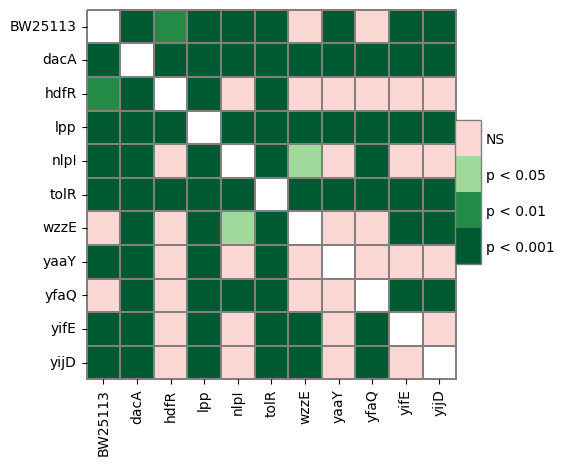

In [23]:
pc = sp.posthoc_dunn(result_dataframes, val_col='cell_compactness', group_col='strain', p_adjust = 'bonferroni') #Benjamini/Hochberg = fdr_by
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

C:\Users\jade\AppData\Local\Temp\ipykernel_29040\3600811777.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="strain", y="C3_glcm_contour_contrast", palette=custom_palette)


<Axes: xlabel='strain', ylabel='C3_glcm_contour_contrast'>

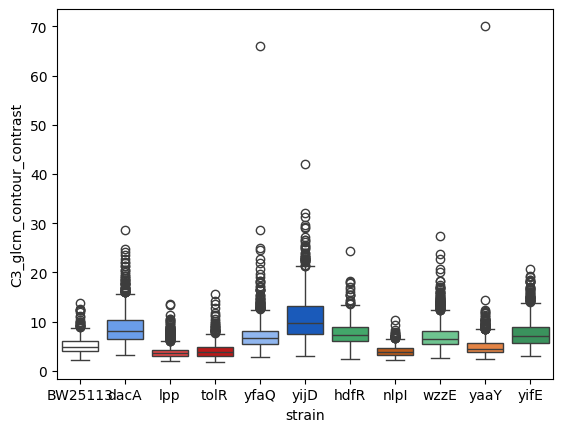

In [25]:
data = result_dataframes
data['strain'] = data['strain'].astype(str)
# print(data)

# Define custom color palette
custom_palette = {
    'BW25113': 'white',
    'yfaQ': '#80b3ffff',
    'dacA': '#5599ffff',
    'yijD': '#0055d4ff',
    'yaaY': '#ff7f2aff',
    'nlpI': '#d45500ff',
    'lpp': '#ff2a2aff',
    'tolR': '#d40000ff',
    'wzzE': '#5fd38dff',
    'hdfR': '#32b867ff',
    'yifE': '#2ca05aff'
}

sns.boxplot(data=data, x="strain", y="C3_glcm_contour_contrast", palette=custom_palette)


C:\Users\jade\AppData\Local\Temp\ipykernel_29040\2998701709.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=data, x="strain", y="C2_cell_obj_contour_avg_bending_energy", palette=custom_palette)


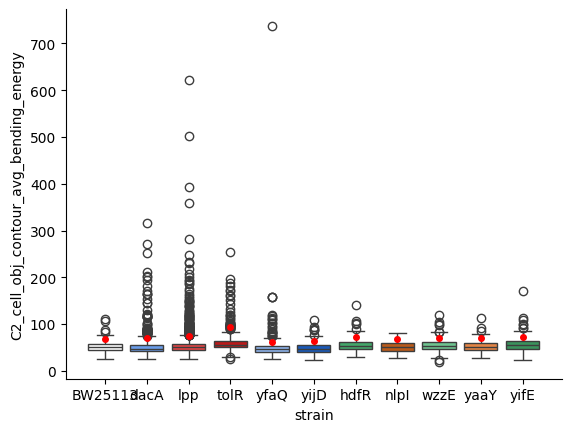

In [28]:

data = result_dataframes
data['strain'] = data['strain'].astype(str)
# print(data)

# Define custom color palette
custom_palette = {
    'BW25113': 'white',
    'yfaQ': '#80b3ffff',
    'dacA': '#5599ffff',
    'yijD': '#0055d4ff',
    'yaaY': '#ff7f2aff',
    'nlpI': '#d45500ff',
    'lpp': '#ff2a2aff',
    'tolR': '#d40000ff',
    'wzzE': '#5fd38dff',
    'hdfR': '#32b867ff',
    'yifE': '#2ca05aff'
}

# Create the boxplot with means
ax = sns.boxplot(data=data, x="strain", y="C2_cell_obj_contour_avg_bending_energy", palette=custom_palette)
                 
# Set the y-axis limit
# ax.set_ylim(0, 300)

# Remove the grid
sns.despine(ax=ax)
ax.grid(False)

# Calculate and plot the 95th percentile for each strain
strains = data['strain'].unique()
for i, strain in enumerate(strains):
    strain_data = data[data['strain'] == strain]['C2_cell_obj_contour_avg_bending_energy']
    pr95 = np.percentile(strain_data, 95)
    ax.plot(i, pr95, 'o', markersize=4, color='red')
    # ax.annotate(f'{pr95:.2f}', xy=(i, pr95), xytext=(i, pr95 + 10),
    #             ha='center', fontsize=15, color='red')

# Show the plot
plt.show()

C:\Users\jade\AppData\Local\Temp\ipykernel_29040\3290696509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="strain", y="cell_convexity", palette=custom_palette)


<Axes: xlabel='strain', ylabel='cell_convexity'>

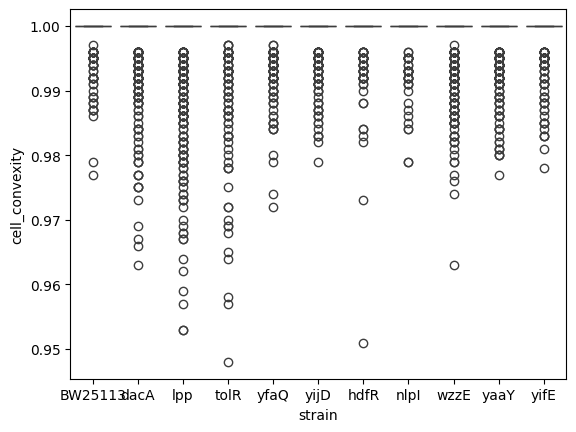

In [32]:
### Convexity number ###
sns.boxplot(data=data, x="strain", y="cell_convexity", palette=custom_palette)

C:\Users\jade\AppData\Local\Temp\ipykernel_29040\1849121461.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="strain", y="cell_convexity_ordinal", palette=custom_palette)


<Axes: xlabel='strain', ylabel='cell_convexity_ordinal'>

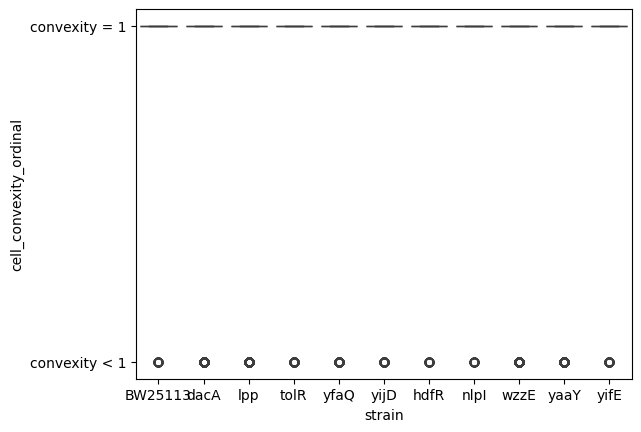

In [39]:
# Define the bins and labels
bins = [0, 1]
labels = ['convexity < 1',  'convexity = 1']

# Create a function to map the convexity values to labels
def map_convexity(convexity):
    if convexity == 1:
        return 'convexity = 1'
    
    else:
        return 'convexity < 1'

# Apply the mapping function to create the new column
data['cell_convexity_ordinal'] = data['cell_convexity'].apply(map_convexity)

# Now you can use sns.boxplot with the new column
sns.boxplot(data=data, x="strain", y="cell_convexity_ordinal", palette=custom_palette)

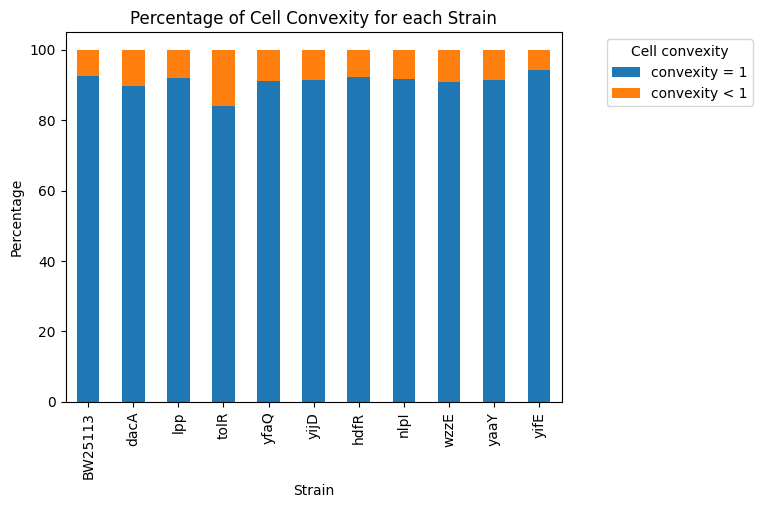

In [40]:
# Calculate the percentage of each strain for each value of "cell_convexity_ordinal"
percentage = data.groupby(['strain', 'cell_convexity_ordinal']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)

# Reset index to make 'strain' a regular column
percentage.reset_index(inplace=True)

# Define the order of strains as desired
strain_order = ['BW25113', 'dacA', 'lpp', 'tolR', 'yfaQ', 'yijD', 'hdfR', 'nlpI', 'wzzE', 'yaaY', 'yifE']

# Convert the values in the DataFrame to percentages
percentage.iloc[:, 1:] *= 100  # Assuming the columns from 1 onwards represent percentages

# Reorder the columns based on the desired order
column_order = ['convexity = 1', 'convexity < 1']
percentage = percentage[['strain'] + column_order]

# Reorder the DataFrame based on the categorical order of 'strain'
percentage['strain'] = pd.Categorical(percentage['strain'], categories=strain_order, ordered=True)
percentage_sorted = percentage.sort_values('strain')

# Plot the stacked bar plot with the sorted DataFrame
ax = percentage_sorted.set_index('strain').plot(kind='bar', stacked=True)
ax.set(xlabel='Strain', ylabel='Percentage', title='Percentage of Cell Convexity for each Strain')
ax.legend(title='Cell convexity', loc='upper right', bbox_to_anchor=(1.4, 1))